In [18]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import cross_val_score as CVS, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier 
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot
from xgboost import plot_importance
from datetime import datetime

from sklearn.metrics import accuracy_score

#from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings("ignore")

from time import time
import datetime

# df= pd.read_csv('file.csv')

df= pd.read_csv('__source__.csv')


In [19]:
sam = 65000
df = df.iloc[:sam]

df2 = df

dfdata = df.loc[:,df.columns.drop('power')]

# dfdata = df.loc[:,['T','direction32','ws30','dir10','mslp','clc','senf','latf','swr','lwr','ps','T2m','RH2m','Time','month']]
dfpower = df['power']


def split_function(split,dfdata,dfpower,df2):
    '''
    这里写了个分列的函数，split 的意思是以多少分开（也许后期可以改成以多少百分比分开，只需要检测一下sample number就行），
    dfdata 是输入的那些数据pandas集， dfpower是输出的那些数据pandas集
    输出结果test代表验证集 train可以用来测试数据
    
    '''
    testData = dfdata.iloc[split:]
    testPower = dfpower.iloc[split:]
    trainPower = dfpower.iloc[:split]
    trainData = dfdata.iloc[:split]
    valid = df2.iloc[split:]
    return testData,testPower,trainPower,trainData,valid

split = 60000 # 从一万开始分开
X_test,y_test,y_train,X_train,valid = split_function(split,dfdata,dfpower,df2)



In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from sklearn.model_selection import RandomizedSearchCV


In [21]:
# 不能用labelEncoder
# le = LabelEncoder()
# Y_train = le.fit_transform(Y_train)

### fit model for train data
model = XGBRegressor()

 

In [22]:
from math import gamma



params_s={'max_depth':[5,10,20,30,40,50],
            'n_estimators':[100,150,200,300,350,400,450,500,550,700,750],
            'learning_rate': [0.1,0.2, 0.3,0.4,0.5,0.8],
            'min_child_samples':[10,50,100,200],
            'colsample_bytree':[0.7,0.8,0.9,1.0],
            'gamma':[0,0.01,0.1,1],
            'subsample':[0.6, 0.7, 0.8, 0.9, 1],
            'reg_alpha':[0, 0.01,0.1, 1,2,3,4,5,7,10],
            'reg_lambda':[0, 0.1, 0.5, 1,2,3,4,5,7,10],

            'max_delta_step':[0,1,2,3,4,5,7,10]
            }
model=RandomizedSearchCV(model,params_s,n_iter=100,scoring='neg_mean_absolute_error',cv=5,verbose=1,random_state=42,n_jobs=-1)
model.fit(X_train, y_train) 
# model=GridSearchCV(model,params_s,scoring='neg_root_mean_squared_error',cv=2,verbose=1,n_jobs=-1)
best_part = model.best_params_
best_part


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[02:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'subsample': 0.8,
 'reg_lambda': 10,
 'reg_alpha': 10,
 'n_estimators': 450,
 'min_child_samples': 10,
 'max_depth': 30,
 'max_delta_step': 7,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [23]:


'''model = XGBRegressor(max_depth=best_part['max_depth'],
                    n_estimitors= best_part['n_estimitors'],
                    learning_rate = best_part['learning_rate'],
                    min_child_samples = best_part['min_child_samples'],
                    colsample_bytree = best_part['colsample_bytree'],
                    gamma = best_part['gamma'],
                    booster='gbtree',
                    reg_alpha=best_part['reg_alpha'],
                    reg_lambda=best_part['reg_lambda'],
                    random_state=42


)'''

# best_part = {'subsample': 0.8,
#  'reg_lambda': 0.5,
#  'reg_alpha': 1,
#  'n_estimators': 150,
#  'min_child_samples': 10,
#  'max_depth':25,
#  'learning_rate': 0.2,
#  'gamma': 0.1,
#  'colsample_bytree': 0.75
#  }



# second time 
# best_part = {'subsample': 1,
#  'reg_lambda': 0,
#  'reg_alpha': 5,
#  'n_estimators': 700,
#  'min_child_samples': 100,
#  'max_depth': 5,
#  'max_delta_step': 7,
#  'learning_rate': 0.1,
#  'gamma': 0.1,
#  'colsample_bytree': 0.7}



# {'subsample': 0.8,
#  'reg_lambda': 10,
#  'reg_alpha': 10,
#  'n_estimators': 450,
#  'min_child_samples': 10,
#  'max_depth': 30,
#  'max_delta_step': 7,
#  'learning_rate': 0.1,
#  'gamma': 0,
#  'colsample_bytree': 1.0}


model = XGBRegressor(max_depth=best_part['max_depth'],
                    n_estimators= best_part['n_estimators'],
                    learning_rate = best_part['learning_rate'],
                    min_child_samples = best_part['min_child_samples'],
                    colsample_bytree = best_part['colsample_bytree'],
                    gamma = best_part['gamma'],
                    booster='gbtree',
                    reg_alpha=best_part['reg_alpha'],
                    reg_lambda=best_part['reg_lambda'],
                    max_delta_step = best_part['max_delta_step']
                    # eval_metric = ['rsme','auc','mape']


)

model.fit(X_train,y_train)
 


[02:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=7, max_depth=30, max_leaves=0, min_child_samples=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=450, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=10, ...)

In [24]:
y_pred_test = model.predict(X_test)
R2  = r2_score(y_test,y_pred_test)
R2

0.8442162840423091

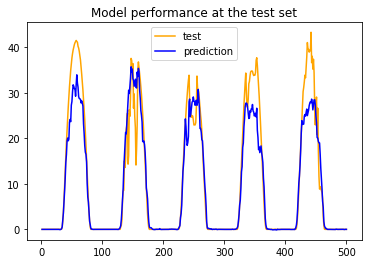

In [25]:
plt.plot(range(1,501),y_test[:500],c="orange",label="test")
plt.plot(range(1,501),y_pred_test[:500],c="blue",label="prediction")
plt.title('Model performance at the test set')

plt.legend()

In [26]:
# 
y_pred = model.predict(X_train)
R22  = r2_score(y_train,y_pred)
R22

0.9997833924842215

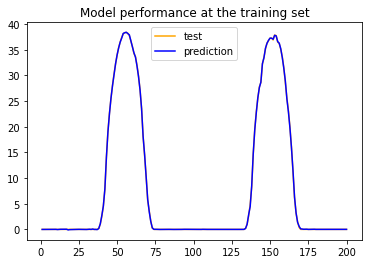

In [27]:
plt.plot(range(1,201),y_train[:200],c="orange",label="test")
plt.plot(range(1,201),y_pred[:200],c="blue",label="prediction")
plt.title('Model performance at the training set')
plt.legend()

In [28]:
valid['prediction'] = y_pred_test

valid_larger = valid[valid['power'] >=0.1]
y_prediction = valid_larger['prediction']
y_real = valid_larger['power']

MAPE1 = MAPE(y_prediction,y_real)
print('MAPE',MAPE1)




def rmse_func(y_prediction,y_real):
    return np.sqrt(MSE(y_prediction,y_real))
RMSE = rmse_func(y_prediction,y_real)
print('RSME',RMSE)
print('预测平均值',y_prediction.mean())
print('真实平均值',y_real.mean())


MAPE 3.311076653264171
RSME 8.223108874613509
预测平均值 21.384706
真实平均值 21.372286271331827


In [29]:
def smape_func(A,F):
    return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

smape = smape_func(y_prediction,y_real)
print('SMAPE',smape)

# 这个是之前提到的那个百分率
# accuracy_factor = np.sqrt(sum((np.array(y_prediction) - np.array(y_real)) ** 2  / (y_real**2) ) )/len(y_real)

# print(accuracy_factor)


SMAPE 0.3641457444995595


In [30]:
y_pred_test_pd = pd.DataFrame(y_pred_test,columns = ['prediction'])
y_pred_test_pd
valid = valid.reset_index()
valid_con = pd.concat([valid,y_pred_test_pd])
valid_larger = valid_con[valid_con['power'] >=0.1]
y_prediction = valid_larger['prediction']
y_real = valid_larger['power']




accuracy_factor = np.sqrt(sum((np.array(y_prediction) - np.array(y_real)) ** 2  / (y_real*len(y_real)) ) )
print(accuracy_factor)


2.386044285274648


In [31]:
# y_pred_test_pd = pd.DataFrame(y_pred_test,columns = ['prediction'])

# valid = pd.merge(valid,y_pred_test_pd)

# print(valid.loc[:,['power','prediction']])
